In diesem Notebook werden Bilder mit den assoziierten Sensordaten dargestellt.

In [63]:
import pandas
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.interpolate import interp1d
import numpy as np

In [64]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("../merkmale.csv")
featuresDf.describe()

,Zeitstempel,Breitengrad,Laengengrad,Geschwindigkeit,Messwerte,StartBewegungsD,StartBelichtung,Belichtungszeit,MittelX,MittelY,...,VarianzX,VarianzY,VarianzZ,VarianzNick,VarianzRoll,AbweichungX,AbweichungY,AbweichungZ,AbweichungNick,AbweichungRoll
count,1.214900e+04,12149.000000,12149.000000,12149.000000,12149.0,1.214900e+04,1.214900e+04,1.214900e+04,12149.000000,12149.000000,...,12149.000000,12149.000000,12149.000000,12149.000000,12149.000000,12149.000000,12149.00000,12149.000000,12149.000000,12149.000000
mean,1.520521e+12,53.621404,10.175575,15.419228,20.0,3.972071e+12,3.972161e+12,1.931440e+07,0.001482,0.003506,...,2.121109,16.710875,17.784782,0.176490,0.252438,1.200596,3.22775,3.402667,0.380466,0.323835
std,1.226303e+06,0.006939,0.018062,3.447197,0.0,1.226303e+12,1.226303e+12,8.842717e+06,0.279567,0.564297,...,4.805029,37.120677,34.064271,0.165855,0.595264,0.824460,2.50859,2.491415,0.178153,0.384162
min,1.520519e+12,53.610477,10.137807,5.004000,20.0,1.618455e+12,1.618559e+12,4.127597e+06,-2.285901,-4.989452,...,0.000370,0.000230,0.000380,0.000000,0.000010,0.019240,0.01517,0.019490,0.000000,0.003160
25%,1.520520e+12,53.614110,10.161995,13.608000,20.0,2.973751e+12,2.973839e+12,1.000184e+07,-0.141578,-0.247978,...,0.515670,3.221720,3.578670,0.059210,0.011630,0.718100,1.79492,1.891740,0.243330,0.107840
50%,1.520521e+12,53.621760,10.177186,15.804000,20.0,3.963729e+12,3.963809e+12,2.000368e+07,0.000789,-0.004989,...,0.937230,6.096390,6.850140,0.114540,0.025740,0.968110,2.46909,2.617280,0.338440,0.160440
75%,1.520523e+12,53.627620,10.190325,17.712000,20.0,4.998830e+12,4.998939e+12,2.999632e+07,0.140186,0.253781,...,1.950760,13.289150,15.018690,0.240750,0.099260,1.396700,3.64543,3.875400,0.490660,0.315060
max,1.520523e+12,53.635113,10.203202,24.984000,20.0,5.977850e+12,5.977940e+12,2.999632e+07,2.644231,5.218423,...,144.743590,502.054320,575.782600,1.071350,5.731200,12.030940,22.40657,23.995470,1.035060,2.393990


In [65]:
featuresDf.columns

Index(['Zeitstempel', 'Breitengrad', 'Laengengrad', 'Geschwindigkeit',
       'AccelerometerX', 'AccelerometerY', 'AccelerometerZ', 'Azimuth', 'Nick',
       'Roll', 'SensorZeitstempel', 'Messwerte', 'StartBewegungsD',
       'StartBelichtung', 'Belichtungszeit', 'MittelX', 'MittelY', 'MittelZ',
       'MittelNick', 'MittelRoll', 'AzimuthAenderung', 'VarianzX', 'VarianzY',
       'VarianzZ', 'VarianzNick', 'VarianzRoll', 'AbweichungX', 'AbweichungY',
       'AbweichungZ', 'AbweichungNick', 'AbweichungRoll'],
      dtype='object')

In [66]:
sensorTimestampsDf = pandas.DataFrame(np.array(featuresDf.SensorZeitstempel.str.split(" ").tolist()).astype(float))
accX = pandas.DataFrame(np.array(featuresDf.AccelerometerX.str.split(" ").tolist()).astype(float))
accY = pandas.DataFrame(np.array(featuresDf.AccelerometerY.str.split(" ").tolist()).astype(float))
accZ = pandas.DataFrame(np.array(featuresDf.AccelerometerZ.str.split(" ").tolist()).astype(float))
nick = pandas.DataFrame(np.array(featuresDf.Nick.str.split(" ").tolist()).astype(float))
roll = pandas.DataFrame(np.array(featuresDf.Roll.str.split(" ").tolist()).astype(float))
azimuth = pandas.DataFrame(np.array(featuresDf.Azimuth.str.split(" ").tolist()).astype(float))

In [74]:
row = 7000 # TODO änderung Zugriff mit Hilde eines Zeitstempels?
timestampsMinMax = [sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1]]
featuresDf.Zeitstempel[row]

1520521865286

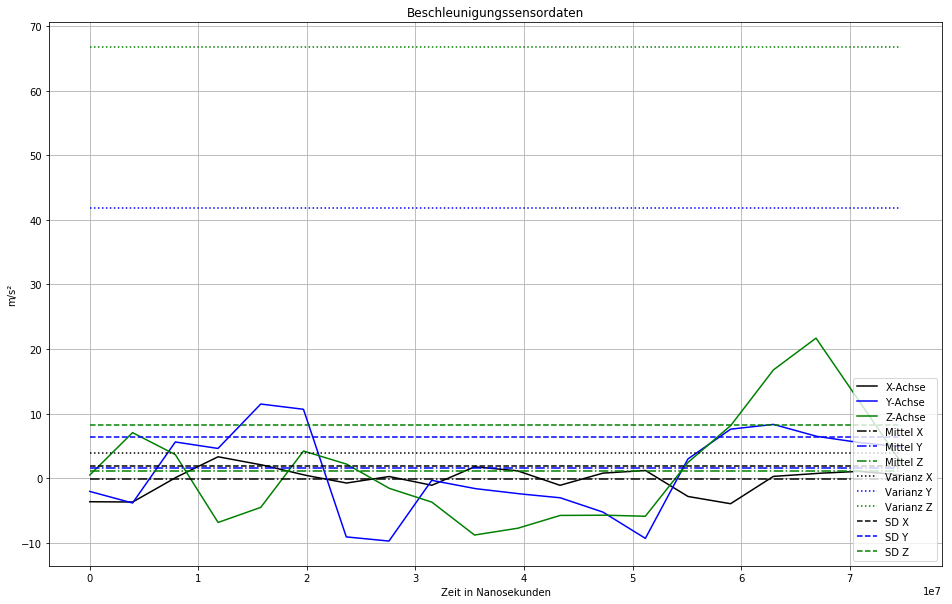

In [96]:
plt.figure(figsize=(16,10))
fAccX = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(accX.iloc[[row]]).squeeze())
fAccY = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(accY.iloc[[row]]).squeeze())
fAccZ = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(accZ.iloc[[row]]).squeeze())
xnew = np.arange(sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1],10000)
plt.plot(xnew,fAccX(xnew),'k-',xnew,fAccY(xnew),'b-',xnew,fAccZ(xnew),'g-',
        timestampsMinMax,[featuresDf.MittelX.iloc[row],featuresDf.MittelX.iloc[row]], 'k-.',
        timestampsMinMax,[featuresDf.MittelY.iloc[row],featuresDf.MittelY.iloc[row]], 'g-.',
        timestampsMinMax,[featuresDf.MittelZ.iloc[row],featuresDf.MittelZ.iloc[row]], 'b-.',
        timestampsMinMax,[featuresDf.VarianzX.iloc[row],featuresDf.VarianzX.iloc[row]], 'k:',
        timestampsMinMax,[featuresDf.VarianzY.iloc[row],featuresDf.VarianzY.iloc[row]], 'b:',
        timestampsMinMax,[featuresDf.VarianzZ.iloc[row],featuresDf.VarianzZ.iloc[row]], 'g:',
        timestampsMinMax,[featuresDf.AbweichungX.iloc[row],featuresDf.AbweichungX.iloc[row]], 'k--',
        timestampsMinMax,[featuresDf.AbweichungY.iloc[row],featuresDf.AbweichungY.iloc[row]], 'b--',
        timestampsMinMax,[featuresDf.AbweichungZ.iloc[row],featuresDf.AbweichungZ.iloc[row]], 'g--')
xLine = mlines.Line2D([], [], color='black', linestyle='-', label='X-Achse')
yLine = mlines.Line2D([], [], color='blue', linestyle='-', label='Y-Achse')
zLine = mlines.Line2D([], [], color='green', linestyle='-', label='Z-Achse')
mXLine = mlines.Line2D([], [], color='black', linestyle='-.', label='Mittel X')
mYLine = mlines.Line2D([], [], color='blue', linestyle='-.', label='Mittel Y')
mZLine = mlines.Line2D([], [], color='green', linestyle='-.', label='Mittel Z')
vXline = mlines.Line2D([], [], color='black', linestyle=':', label='Varianz X')
vYline = mlines.Line2D([], [], color='blue', linestyle=':', label='Varianz Y')
vZline = mlines.Line2D([], [], color='green', linestyle=':', label='Varianz Z')
dXline = mlines.Line2D([], [], color='black', linestyle='--', label='SD X')
dYline = mlines.Line2D([], [], color='blue',linestyle='--', label='SD Y')
dZline = mlines.Line2D([], [], color='green', linestyle='--', label='SD Z')
plt.legend(handles=[xLine,yLine,zLine,mXLine,mYLine,mZLine,vXline,vYline,vZline,dXline,dYline,dZline], loc='lower right', framealpha=0.8)
plt.title('Beschleunigungssensordaten')
plt.xlabel('Zeit in Nanosekunden')
plt.ylabel('m/s²')
plt.grid()

In [99]:
featuresDf.AbweichungX.iloc[row]

1.9674200000000002

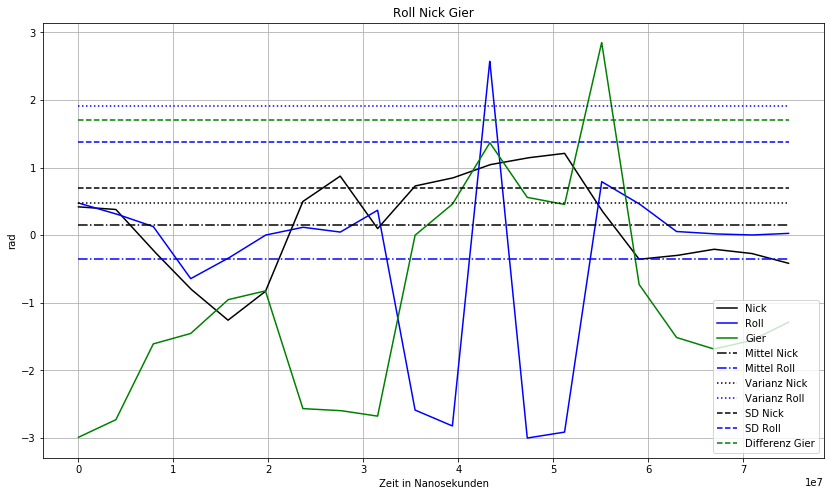

In [98]:
plt.figure(figsize=(14,8))
fNick = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(nick.iloc[[row]]).squeeze())
fRoll = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(roll.iloc[[row]]).squeeze())
fAzimuth = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(azimuth.iloc[[row]]).squeeze())
plt.plot(xnew,fNick(xnew),'k-',xnew,fRoll(xnew),'b-',xnew,fAzimuth(xnew),'g-',
        timestampsMinMax,[featuresDf.MittelNick.iloc[row],featuresDf.MittelNick.iloc[row]], 'k-.',
        timestampsMinMax,[featuresDf.MittelRoll.iloc[row],featuresDf.MittelRoll.iloc[row]], 'b-.',
        timestampsMinMax,[featuresDf.VarianzNick.iloc[row],featuresDf.VarianzNick.iloc[row]], 'k:',
        timestampsMinMax,[featuresDf.VarianzRoll.iloc[row],featuresDf.VarianzRoll.iloc[row]], 'b:',
        timestampsMinMax,[featuresDf.AbweichungNick.iloc[row],featuresDf.AbweichungNick.iloc[row]], 'k--',
        timestampsMinMax,[featuresDf.AbweichungRoll.iloc[row],featuresDf.AbweichungRoll.iloc[row]], 'b--',
        timestampsMinMax,[featuresDf.AzimuthAenderung.iloc[row],featuresDf.AzimuthAenderung.iloc[row]], 'g--')
pLine = mlines.Line2D([], [], color='black', linestyle='-', label='Nick')
rLine = mlines.Line2D([], [], color='blue', linestyle='-', label='Roll')
aLine = mlines.Line2D([], [], color='green', linestyle='-', label='Gier')
mPline = mlines.Line2D([], [], color='black', linestyle='-.', label='Mittel Nick')
mRline = mlines.Line2D([], [], color='blue', linestyle='-.', label='Mittel Roll')
vPline = mlines.Line2D([], [], color='black', linestyle=':', label='Varianz Nick')
vRline = mlines.Line2D([], [], color='blue', linestyle=':', label='Varianz Roll')
dPline = mlines.Line2D([], [], color='black', linestyle='--', label='SD Nick')
dRline = mlines.Line2D([], [], color='blue', linestyle='--', label='SD Roll')
aCline = mlines.Line2D([], [], color='green', linestyle='--', label='Differenz Gier')
plt.legend(handles=[pLine,rLine,aLine,mPline,mRline,vPline,vRline,dPline,dRline,aCline],loc='lower right', framealpha=0.8)
plt.title('Roll Nick Gier')
plt.xlabel('Zeit in Nanosekunden')
plt.ylabel('rad')
plt.grid()